In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cps_loader import apply_filters

In [31]:
df = pd.read_csv('./data/cps_data/all_years.csv')

In [5]:
df2 = df_copy.copy()

In [10]:
df_copy = df2.copy()

In [1]:
df = apply_filters(df_copy, min_age=26, max_age=65)
df = df[df['income_year']<=2018] 
df['labor_income'].mean()

NameError: name 'apply_filters' is not defined

In [52]:
def calculate_statistics_year(df):
    stats = []
    for year in range(1975, 2023):
        df_year = df[df['income_year'] == year]
        for sex in [1, 2]:  # 1 for men, 2 for women
            df_sex = df_year[df_year['SEX'] == sex]
            positive_earnings = (df_sex['labor_income'] > 0).mean()
            full_time_full_year = df_sex['is_full_time_full_year'].mean()
            positive_cap_income = (df_sex['capital_income'] > 0).mean()
            avg_earnings = df_sex['labor_income'].mean()
            avg_cap_income = df_sex['capital_income'].mean()
            
            stats.append({
                'year': year,
                'sex': sex,
                'positive_earnings': positive_earnings,
                'full_time_full_year': full_time_full_year,
                'positive_cap_income': positive_cap_income,
                'avg_earnings': avg_earnings,
                'avg_cap_income': avg_cap_income
            })
        
        # Overall stats (combined)
        df_all = df_year
        positive_earnings_all = (df_all['labor_income'] > 0).mean()
        full_time_full_year_all = df_all['is_full_time_full_year'].mean()
        positive_cap_income_all = (df_all['capital_income'] > 0).mean()
        avg_earnings_all = df_all['labor_income'].mean()
        avg_cap_income_all = df_all['capital_income'].mean()
        
        stats.append({
            'year': year,
            'sex': 'All',
            'positive_earnings': positive_earnings_all,
            'full_time_full_year': full_time_full_year_all,
            'positive_cap_income': positive_cap_income_all,
            'avg_earnings': avg_earnings_all,
            'avg_cap_income': avg_cap_income_all
        })
    
    df_stats = pd.DataFrame(stats)
    
    # Average statistics across all years
    final_stats = df_stats.groupby(['sex']).mean().reset_index()
    
    return final_stats

In [67]:
def calculate_statistics_overall_av(df):
    stats = []
    for sex in [1, 2]:  # 1 for men, 2 for women
        df_sex = df[df['SEX'] == sex]
        positive_earnings = (df_sex['labor_income'] > 0).mean()
        full_time_full_year = df_sex['is_full_time_full_year'].mean()
        positive_cap_income = (df_sex['capital_income'] > 0).mean()
        avg_earnings = df_sex['labor_income'].mean()
        avg_cap_income = df_sex['capital_income'].mean()
            
        stats.append({
            'sex': sex,
            'positive_earnings': positive_earnings,
            'full_time_full_year': full_time_full_year,
            'positive_cap_income': positive_cap_income,
            'avg_earnings': avg_earnings,
            'avg_cap_income': avg_cap_income
        })
        
    # Overall stats (combined)
    df_all = df
    positive_earnings_all = (df_all['labor_income'] > 0).mean()
    full_time_full_year_all = df_all['is_full_time_full_year'].mean()
    positive_cap_income_all = (df_all['capital_income'] > 0).mean()
    avg_earnings_all = df_all['labor_income'].mean()
    avg_cap_income_all = df_all['capital_income'].mean()
        
    stats.append({
        'sex': 'All',
        'positive_earnings': positive_earnings_all,
        'full_time_full_year': full_time_full_year_all,
        'positive_cap_income': positive_cap_income_all,
        'avg_earnings': avg_earnings_all,
        'avg_cap_income': avg_cap_income_all
    })
    
    df_stats = pd.DataFrame(stats)
    
    # Average statistics across all years
    final_stats = df_stats.groupby(['sex']).mean().reset_index()
    
    return final_stats

In [68]:
stats_df = calculate_statistics_overall_av(df)

In [69]:
stats_df.T.to_latex()

/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_5748/1937703257.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  stats_df.T.to_latex()


'\\begin{tabular}{llll}\n\\toprule\n{} &             0 &             1 &             2 \\\\\n\\midrule\nsex                 &             1 &             2 &           All \\\\\npositive\\_earnings   &      0.877955 &      0.706647 &      0.788774 \\\\\nfull\\_time\\_full\\_year &      0.670552 &      0.377789 &      0.518142 \\\\\npositive\\_cap\\_income &      0.556025 &      0.510184 &      0.532161 \\\\\navg\\_earnings        &  58815.577987 &  27343.219763 &  42431.378113 \\\\\navg\\_cap\\_income      &   4372.105956 &   3320.371183 &   3824.583186 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [39]:
df1 = df[(df['is_full_time_full_year'])]

In [40]:
(df1['labor_income'] > 0).mean()

1.0

In [41]:
(df1['is_full_time_full_year'] > 0).mean()

1.0

In [42]:
(df1['capital_income'] > 0).mean()

0.6138337653786767

In [43]:
df1['labor_income'].mean()

67042.59500495756

In [44]:
df1['capital_income'].mean()

4039.5143887315376

In [23]:
yearly_averages = df.groupby('income_year')['labor_income'].mean()

In [67]:
yearly_averages.mean()

41840.58274958134

In [55]:
def percentage_positive(group):
    positive_count = (group > 0).sum()
    total_count = group.count()
    return (positive_count / total_count)

yearly_percent_positive = df.groupby('income_year')['capital_income'].apply(percentage_positive)

# Step 2: Calculate the average of these yearly percentages
overall_average_percent_positive = yearly_percent_positive.mean()
print(yearly_percent_positive.mean())

0.5361777753691815


In [ ]:
df['labor_income'].max()

In [68]:
df1 = df[(df['income_year']>=2010) & (df['income_year']>=1994)] 
df1 = df1[df1['SEX'] == 1]

In [35]:
(df1['labor_income'] > 0).mean()

0.8531005921112272

In [36]:
(df1['is_full_time_full_year'] > 0).mean()

0.66701019614579

In [37]:
(df1['capital_income'] > 0).mean()

0.5138437608843975

In [38]:
df1['labor_income'].mean()

59644.44687907414

In [39]:
df1['capital_income'].mean()

4282.906678802483

In [8]:
(df.loc[(df['labor_income'] > 0.), df['labor_income']]).mean()

KeyError: "None of [Float64Index([        52292.845,          38031.16, 55145.18199999999,\n                   31418.492055,       40921.52816,               0.0,\n                            0.0,          6655.453,        54669.7925,\n              76062.31999999999,\n              ...\n              86504.92499999999,           61062.3,          48849.84,\n                            0.0,         11194.755,          3053.115,\n                       28495.74,          30531.15,         15265.575,\n                      35619.675],\n             dtype='float64', length=3865981)] are in the [columns]"

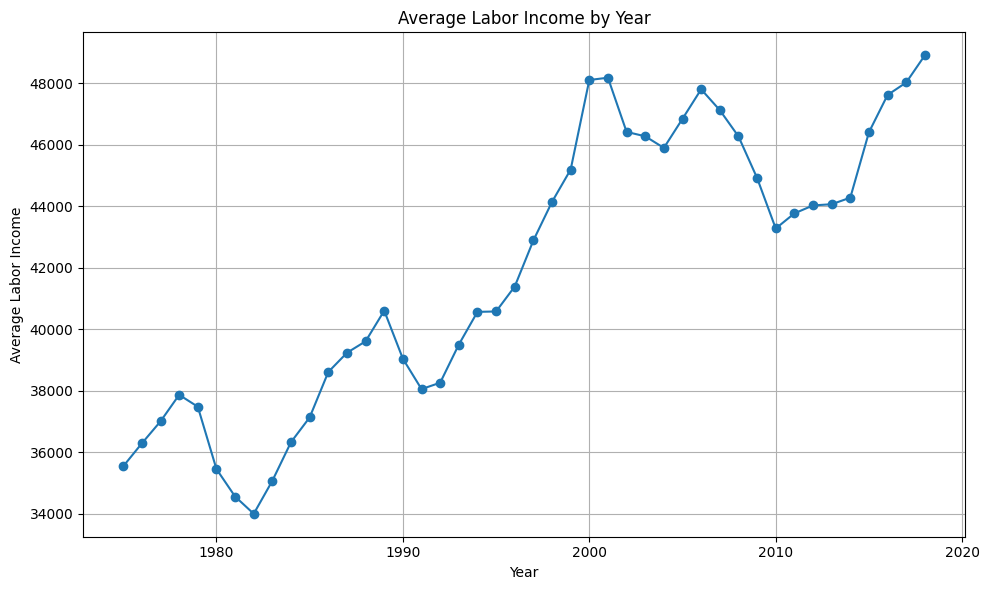

In [64]:
import matplotlib.pyplot as plt

average_labor_income = df.groupby('income_year')['labor_income'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_labor_income['income_year'], average_labor_income['labor_income'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Labor Income')
plt.title('Average Labor Income by Year')
plt.grid(True)
# plt.xticks(average_labor_income_by_year['YEAR'])
plt.tight_layout()

# Show plot
plt.show()

In [9]:
df['total_income'].mean()

40126.362831460836

In [9]:
df['capital_income'].mean()

2158.836887936722

In [15]:
cap_income_fraction = (df['labor_income'] > 0).mean()
cap_income_fraction

0.7941057784435249

In [19]:
(df.loc[(df['SEX'] == 2), 1. if df['labor_income'] > 0 else 0.]).mean()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [28]:
(df.loc[(df['SEX'] == 2), df['total_income']]).mean()

KeyError: "None of [Float64Index([         52292.845,           38031.16,  55145.18199999999,\n                    31418.492055,        40921.52816, 2817.1229629629624,\n                             0.0,  17144.94911078905, 54876.483586956514,\n               76210.21895555555,\n              ...\n                       91796.991,  62576.74078515815,  49315.72273333333,\n                             0.0,          11194.755,           3053.115,\n              28497.247711111107, 30532.657711111107,          15265.575,\n                       35619.675],\n             dtype='float64', length=3865981)] are in the [columns]"

In [14]:
df.loc[(df['SEX'] == 2), 'capital_income'].mean()

3167.7817058396063

In [15]:
cap_income_fraction = (df['is_full_time_full_year'] == True).mean()
cap_income_fraction

0.5224040159535187

In [9]:
df_copy = df.copy()

In [17]:
df['YEAR'].max()

2023

In [6]:
# filter by age 25-64, FTFY, trim 99%
# maybe should change filter function to not modify original df directly
filtered_df = apply_filters(df, min_age=25, max_age=64, full_time_full_year_only=True, remove_top_1_percent=True)
filtered_df2 = df.copy()

In [7]:
# SUMMARY STATISTICS FIG 1 + 2
grouped = filtered_df.groupby(['income_year', 'SEX']).agg(
    lytot_sd=('log_total_income', 'std'),
    lylab_sd=('log_labor_income', 'std'),
    c_over_l_sd=('log_capital_over_labor', 'std'),
    c_over_l_mean=('log_capital_over_labor', 'mean')
).reset_index()

print(grouped)

    income_year  SEX  lytot_sd  lylab_sd  c_over_l_sd  c_over_l_mean
0          1975    1  0.479047  0.470440     0.083950       0.030370
1          1975    2  0.399343  0.392154     0.064488       0.016211
2          1976    1  0.486259  0.477392     0.092675       0.032547
3          1976    2  0.402203  0.394276     0.071391       0.017353
4          1977    1  0.500740  0.491830     0.092280       0.032047
..          ...  ...       ...       ...          ...            ...
83         2016    2  0.567046  0.553159     0.100795       0.028945
84         2017    1  0.647573  0.624398     0.126358       0.040207
85         2017    2  0.581611  0.566003     0.106143       0.031905
86         2018    1  0.637384  0.616967     0.106223       0.036692
87         2018    2  0.574498  0.556905     0.096201       0.030987

[88 rows x 6 columns]


In [ ]:
# 5- YEAR BIN SUMMARY STATISTICS
# Create 5-year bins
bins = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
df['year_bin'] = pd.cut(df['income_year'], bins=bins)

# Group by 5-year bins and sex, then calculate statistics
grouped_bin = filtered_df2.groupby(['year_bin', 'SEX']).agg(
    lytot_sd=('log_total_income', 'std'),
    lylab_sd=('log_labor_income', 'std'),
    c_over_l_sd=('log_capital_over_labor', 'std'),
    c_over_l_mean=('log_capital_over_labor', 'mean')
).reset_index()

print(grouped_bin)

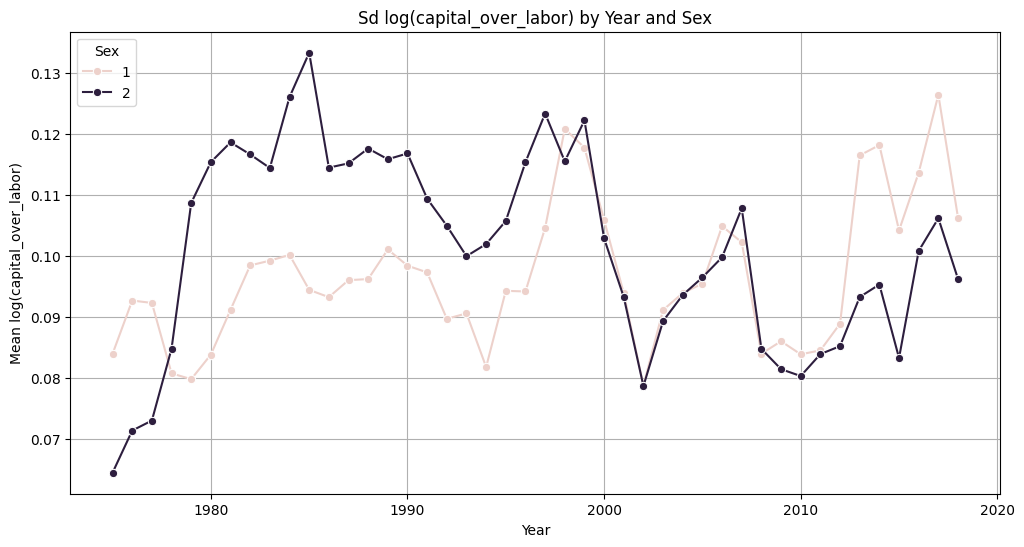

In [10]:
# Plot for the overall statistics by year and sex
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='income_year', y='c_over_l_sd', hue='SEX', marker='o')
plt.title('Sd log(capital_over_labor) by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Mean log(capital_over_labor)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

In [ ]:
# Plot for the statistics by 5-year bins
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_bin, x='year_bin', y='c_over_l_mean', hue='SEX', marker='o')
plt.title('Mean log(capital_over_labor) by 5-Year Bins and Sex')
plt.xlabel('5-Year Bin')
plt.ylabel('Mean log(capital_over_labor)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

In [18]:
# Step 1: Load the CSV file into a pandas DataFrame
df = pd.read_csv('./data/cps_data/all_years.csv')

df = df[(df['AGE'] >= 18) & (df['winsor99']) & (df['YEAR'] >= 1977)]

# Step 2: Ensure the 'year' column is the index and sort the DataFrame by year
df['year'] = pd.to_datetime(df['YEAR'], format='%Y')
df.set_index('year', inplace=True)
df.sort_index(inplace=True)

# Step 3: Plot the time series for each variable
variables = ['labor_income', 'capital_income', 'INCDRT', 'INCINT', 'INCBUS', 'INCFARM', 'INCWAGE']  # replace with your actual variable names

# Step 3: Group by year and calculate the mean for each variable
df_mean = df.groupby('year').mean()

/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_2969/3094472472.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('year').mean()


In [19]:
df_stats = df.groupby('YEAR').agg(['mean', 'std', 'min', 'max', 'median'])

/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_2969/1525267945.py:1: FutureWarning: ['stateXindustry_1950', 'stateXindustry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_stats = df.groupby('YEAR').agg(['mean', 'std', 'min', 'max', 'median'])


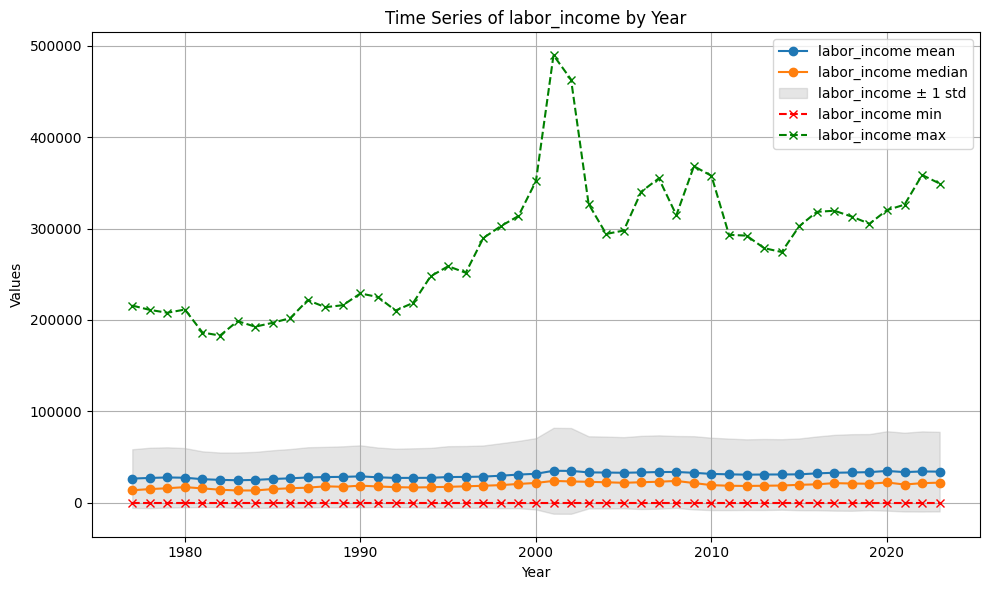

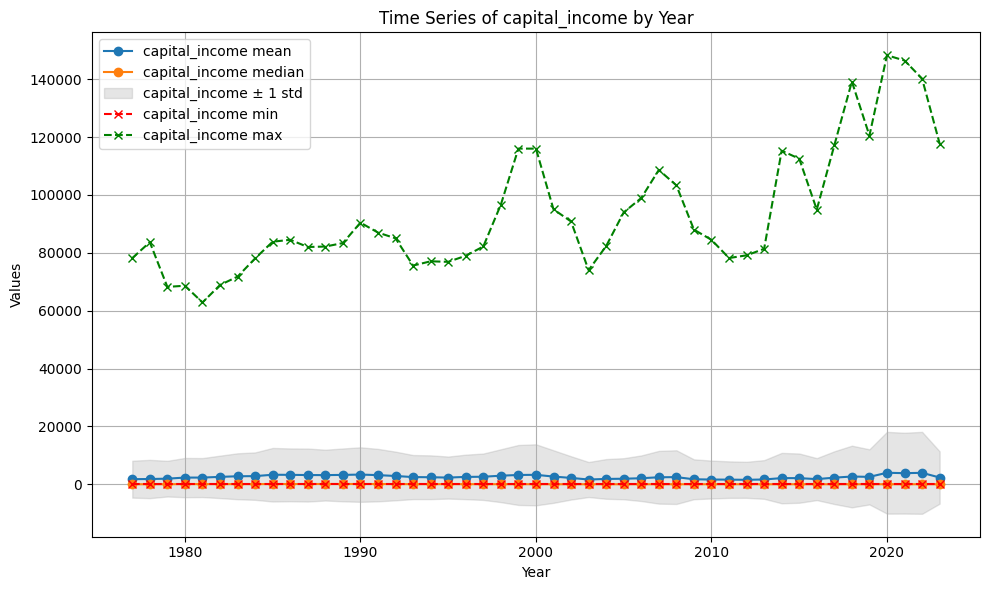

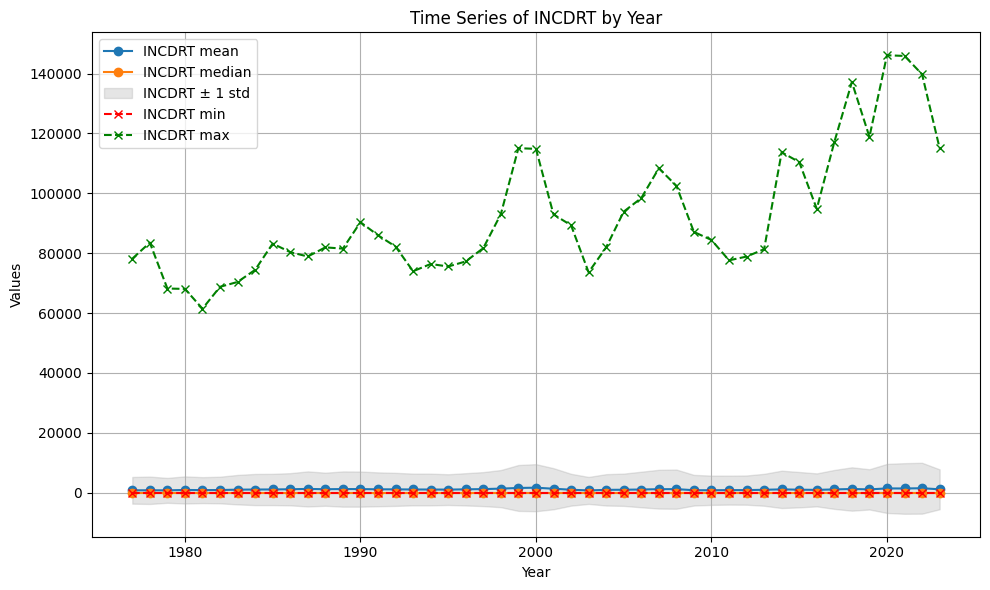

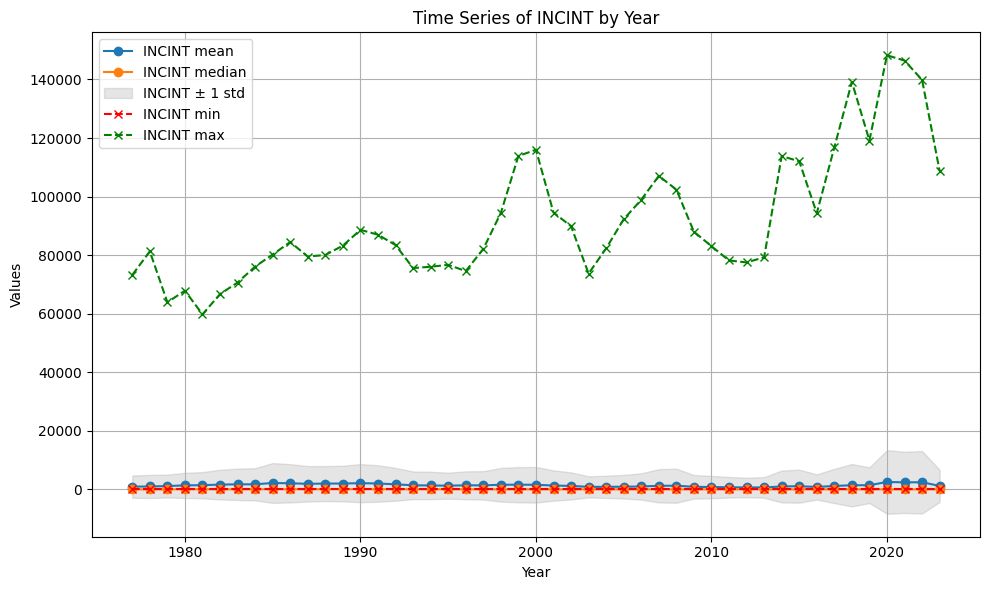

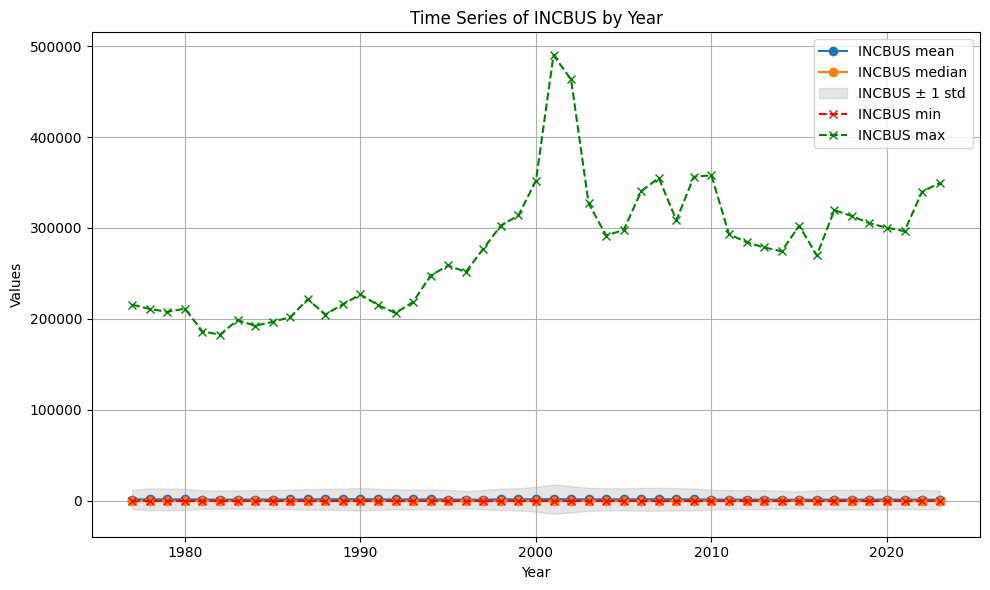

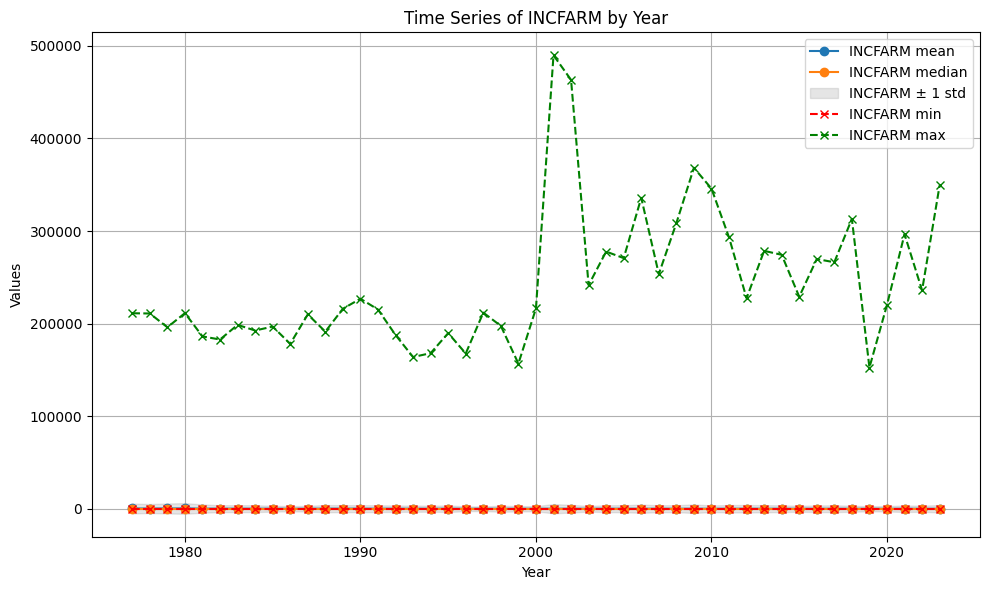

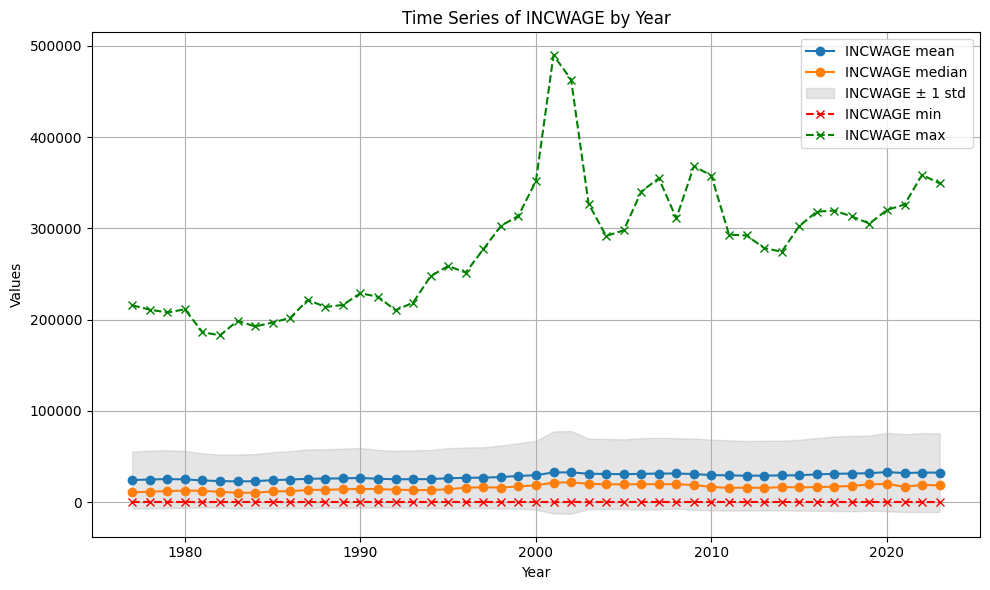

In [20]:
# Step 5: Plot each variable in a separate plot with mean, std deviation, min, and max
for variable in variables:
    plt.figure(figsize=(10, 6))
    
    # Mean
    plt.plot(df_stats.index, df_stats[(variable, 'mean')], marker='o', linestyle='-', label=f'{variable} mean')
    plt.plot(df_stats.index, df_stats[(variable, 'median')], marker='o', linestyle='-', label=f'{variable} median')
    
    # Standard Deviation
    plt.fill_between(df_stats.index, 
                     df_stats[(variable, 'mean')] - df_stats[(variable, 'std')], 
                     df_stats[(variable, 'mean')] + df_stats[(variable, 'std')],
                     color='gray', alpha=0.2, label=f'{variable} ± 1 std')
    
    # Min and Max
    plt.plot(df_stats.index, df_stats[(variable, 'min')], marker='x', linestyle='--', label=f'{variable} min', color='red')
    plt.plot(df_stats.index, df_stats[(variable, 'max')], marker='x', linestyle='--', label=f'{variable} max', color='green')
    
    # Formatting the plot
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.title(f'Time Series of {variable} by Year')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

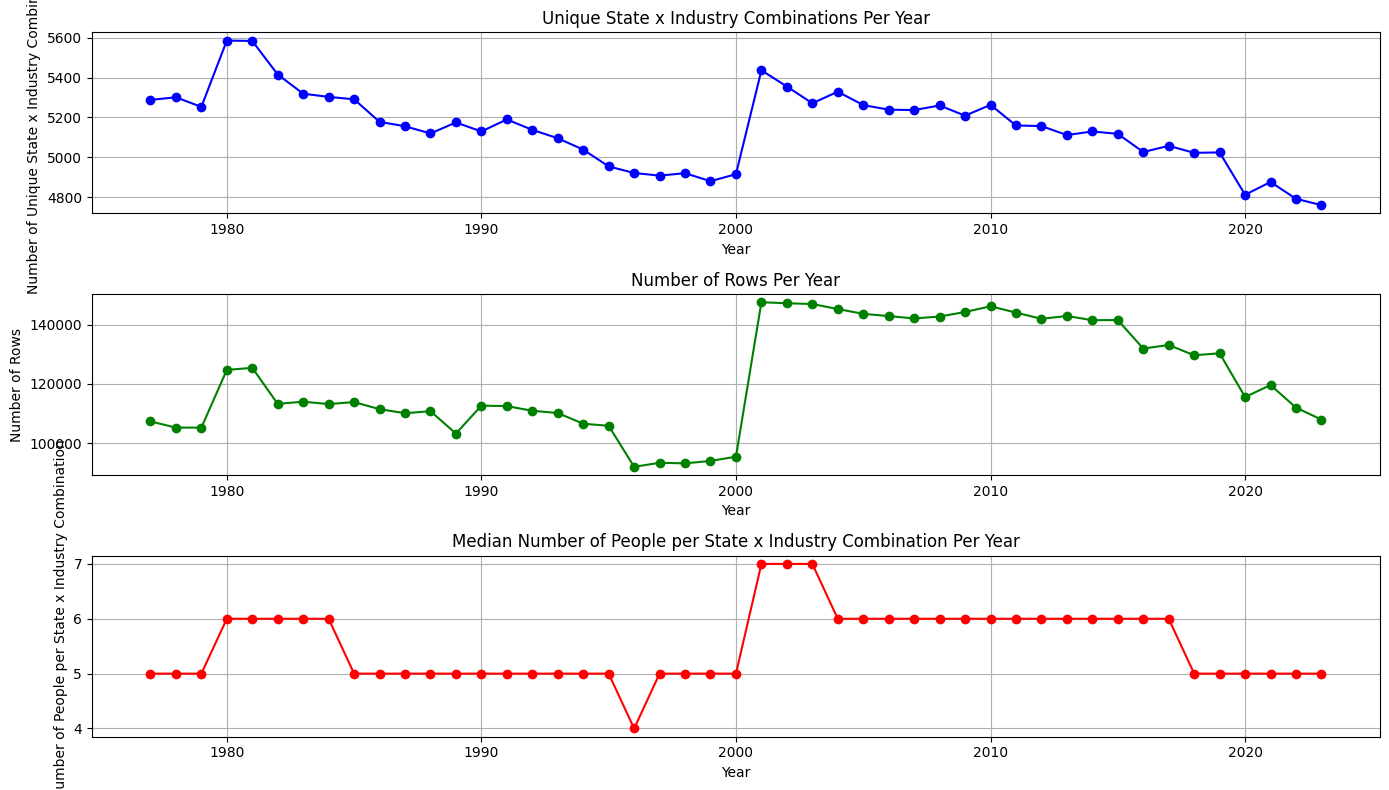

In [22]:
# Create a new column for the state x industry combination
df['stateXindustry'] = df['STATEFIP'].astype(str) + '-' + df['IND1950'].astype(str)

# Calculate the number of unique state x industry combinations per year
unique_combinations_per_year = df.groupby('YEAR')['stateXindustry'].nunique()

states_per_year = df.groupby('YEAR')['stateXindustry'].nunique()

# Calculate the number of rows per year
rows_per_year = df.groupby('YEAR').size()

# Calculate the median number of people per state x industry combination per year
median_people_per_combination_per_year = df.groupby(['YEAR', 'stateXindustry']).size().groupby('YEAR').median()

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot unique combinations per year
plt.subplot(3, 1, 1)
plt.plot(unique_combinations_per_year.index, unique_combinations_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Unique State x Industry Combinations')
plt.title('Unique State x Industry Combinations Per Year')
plt.grid(True)

# Plot rows per year
plt.subplot(3, 1, 2)
plt.plot(rows_per_year.index, rows_per_year.values, marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Per Year')
plt.grid(True)

# Plot median number of people per state x industry combination per year
plt.subplot(3, 1, 3)
plt.plot(median_people_per_combination_per_year.index, median_people_per_combination_per_year.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Median Number of People per State x Industry Combination')
plt.title('Median Number of People per State x Industry Combination Per Year')
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
df['STATECENSUS']

year
1976-01-01     NaN
1976-01-01     NaN
1976-01-01     NaN
1976-01-01     NaN
1976-01-01     NaN
              ... 
2023-01-01    95.0
2023-01-01    95.0
2023-01-01    95.0
2023-01-01    95.0
2023-01-01    95.0
Name: STATECENSUS, Length: 2104402, dtype: float64

In [16]:
df['winsor99']

year
1976-01-01    False
1976-01-01     True
1976-01-01     True
1976-01-01     True
1976-01-01    False
              ...  
2023-01-01     True
2023-01-01    False
2023-01-01     True
2023-01-01     True
2023-01-01    False
Name: winsor99, Length: 5035284, dtype: bool